In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [3]:
# set configurations for number of samples
sample_size = 500
nr_sample = 20

In [4]:
bounded_dists = dm.get_bounded_distribution()
bounded_dists

{'arcsine': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e8b3f0aca0>,
 'beta_1_2': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e8b93d9670>,
 'powerlaw_0.3': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e8b3f0a130>,
 'trapezoid_0.3_0.8': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e8b9429760>,
 'traing_0.3': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e8b9429a00>,
 'uniform': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e8b9429e20>}

In [32]:
x = np.linspace(0,1,20)
edf_df = dem.get_edf(bounded_dists, nr_sample, sample_size, x)
edf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,dist
0,0.0,0.162,0.224,0.262,0.316,0.352,0.384,0.414,0.448,0.476,...,0.548,0.596,0.642,0.676,0.702,0.734,0.794,0.876,1.0,arcsine
1,0.0,0.152,0.218,0.284,0.332,0.378,0.412,0.450,0.482,0.510,...,0.558,0.580,0.612,0.652,0.684,0.738,0.782,0.856,1.0,arcsine
2,0.0,0.136,0.202,0.268,0.316,0.350,0.388,0.424,0.452,0.486,...,0.540,0.572,0.606,0.650,0.686,0.728,0.770,0.842,1.0,arcsine
3,0.0,0.162,0.230,0.274,0.314,0.352,0.384,0.402,0.440,0.460,...,0.534,0.564,0.596,0.646,0.682,0.716,0.778,0.844,1.0,arcsine
4,0.0,0.164,0.230,0.296,0.350,0.390,0.422,0.448,0.488,0.520,...,0.590,0.626,0.664,0.698,0.734,0.780,0.842,0.876,1.0,arcsine


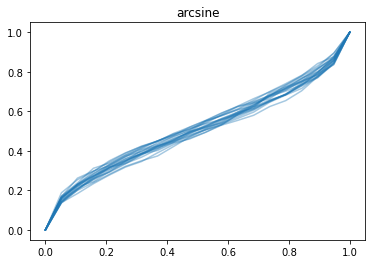

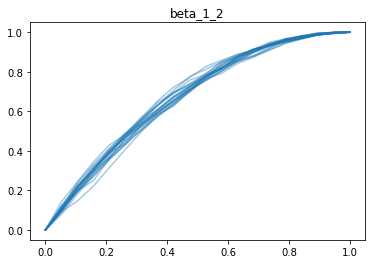

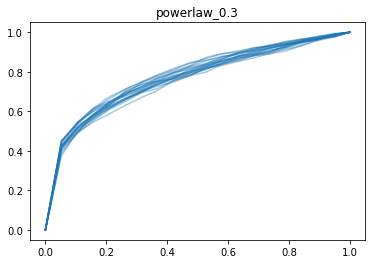

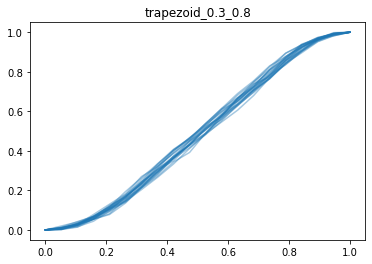

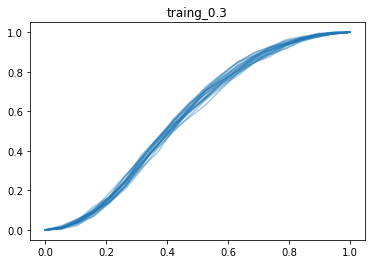

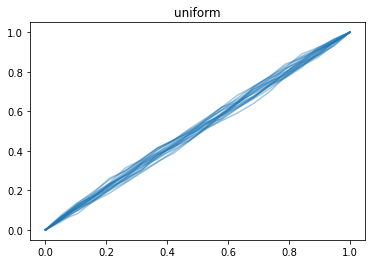

In [13]:
dem.get_edf_plot(bounded_dists, edf_df, nr_sample, sample_size, x)

In [14]:
test_size = 0.2
cv = 5
cm.svm_model(edf_df, test_size, cv)

array([1., 1., 1., 1., 1.])

In [36]:
# testing number of intervals vs accuracy
acc_mean = []
acc_std = []
intervals = list(range(10,200,5))

for i in intervals:
    x = np.linspace(0,1,i)
    edf_df = dem.get_edf(bounded_dists, nr_sample, sample_size, x)
    score = cm.svm_model(edf_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

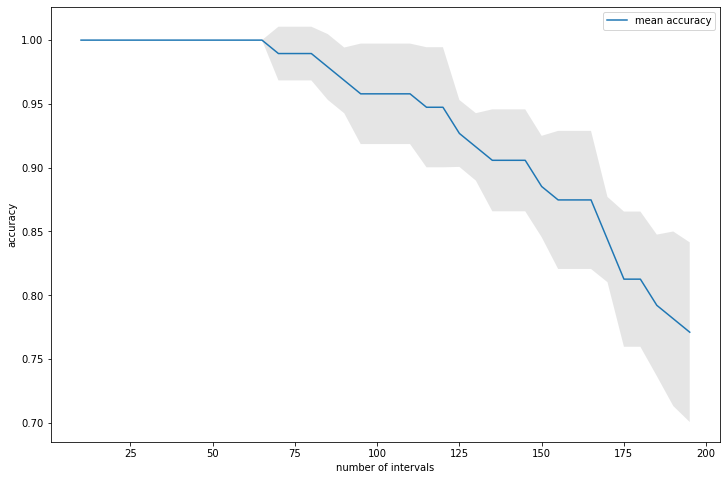

In [40]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(intervals,acc_mean, label='mean accuracy')

plt.gca().fill_between(intervals,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of intervals')
plt.ylabel('accuracy')
plt.legend();

In [41]:
longtail_dists = dm.get_longtail_distribution()
longtail_dists

{'cauchy': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e8ba102940>,
 'lognorm_1.5': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e8ba180550>,
 'pareto_1.5': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e8ba102a90>,
 'weibull_min_0.4': <scipy.stats._distn_infrastructure.rv_frozen at 0x1e8ba177760>}

In [49]:
x = np.linspace(0,20,20)
edf_df = dem.get_edf(longtail_dists, nr_sample, sample_size, x)
edf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,dist
0,0.0,0.512,0.720,0.816,0.876,0.900,0.920,0.938,0.944,0.954,...,0.964,0.964,0.968,0.968,0.968,0.968,0.972,0.976,0.978,cauchy
1,0.0,0.538,0.714,0.798,0.854,0.870,0.890,0.906,0.920,0.926,...,0.936,0.946,0.950,0.950,0.954,0.958,0.958,0.960,0.964,cauchy
2,0.0,0.518,0.708,0.780,0.842,0.878,0.900,0.912,0.920,0.928,...,0.948,0.950,0.950,0.952,0.952,0.956,0.958,0.960,0.964,cauchy
3,0.0,0.494,0.700,0.794,0.844,0.872,0.890,0.900,0.924,0.934,...,0.946,0.954,0.956,0.962,0.964,0.964,0.966,0.966,0.970,cauchy
4,0.0,0.552,0.768,0.850,0.874,0.904,0.914,0.924,0.936,0.938,...,0.948,0.952,0.952,0.954,0.954,0.960,0.960,0.962,0.962,cauchy


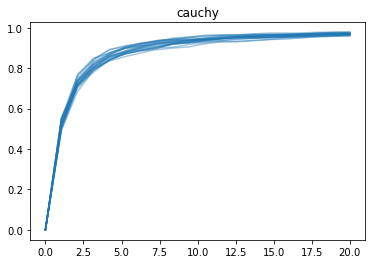

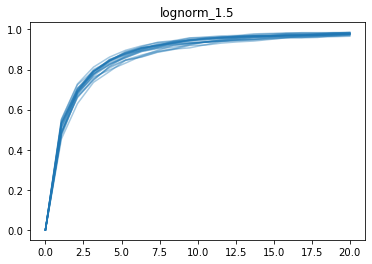

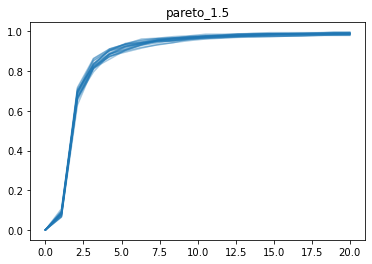

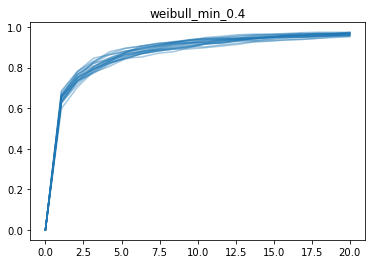

In [50]:
dem.get_edf_plot(longtail_dists, edf_df, nr_sample, sample_size, x)

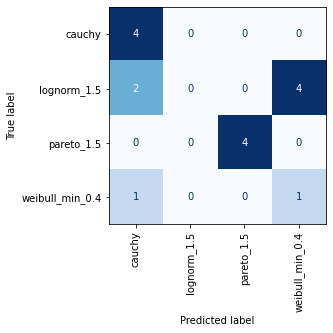

array([0.69230769, 0.76923077, 0.84615385, 0.92307692, 0.83333333])

In [51]:
test_size = 0.2
cv = 5
cm.svm_model(edf_df, test_size, cv, plot=1)

In [47]:
# testing number of intervals vs accuracy
acc_mean = []
acc_std = []
intervals = list(range(10,200,5))

for i in intervals:
    x = np.linspace(0,20,i)
    edf_df = dem.get_edf(longtail_dists, nr_sample, sample_size, x)
    score = cm.svm_model(edf_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

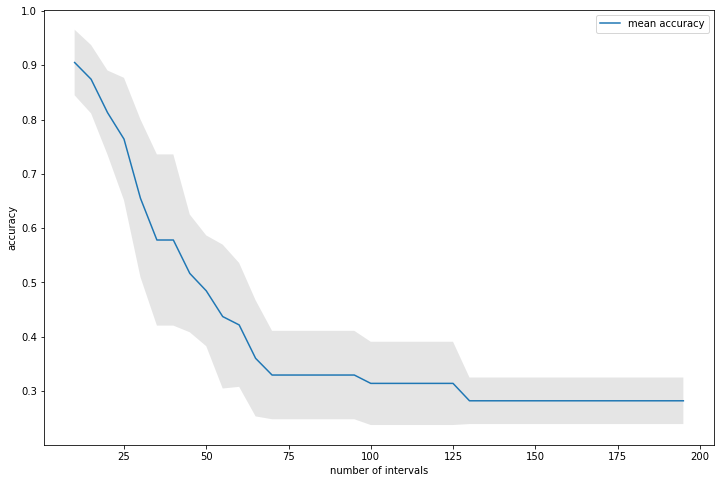

In [48]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(intervals,acc_mean, label='mean accuracy')

plt.gca().fill_between(intervals,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of intervals')
plt.ylabel('accuracy')
plt.legend();